In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
MONTHS_PT = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

In [4]:
df = pd.read_csv('../data/raw/fcpc/pagamento pessoa fisica/2016.csv', decimal=',', thousands='.', parse_dates=[4])

# Oi

In [19]:
df.describe()

,VALOR (R$)
count,11650.000000
mean,2625.725724
std,6613.712112
min,0.000000
25%,250.000000
50%,1313.000000
75%,3200.000000
max,328428.650000


In [24]:
df.describe(exclude=['float64'])

# há mais de uma pessoa para um mesmo CPF mascarado :~

,CPF,NOME,TIPO DE PAGAMENTO,PROJETO,DATA
count,11650,11650,11650,11650,11650
unique,2990,3037,7,140,243
top,***.003.533-**,JARBAS ARYEL NUNES DA SILVEIRA,SERVIÇO PRESTADO - RPA,2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DO...,2016-09-15 00:00:00
freq,39,39,5540,1692,528
first,NaN,NaN,NaN,NaN,2016-01-02 00:00:00
last,NaN,NaN,NaN,NaN,2016-12-29 00:00:00


# Tipos de pagamento

In [25]:
df['TIPO DE PAGAMENTO'].unique()

array(['DIÁRIAS', 'FOLHA DE PAGAMENTO - CLT', 'SERVIÇO PRESTADO - RPA',
       'RESSARCIMENTO DE DESPESA', 'DEVOLUÇÃO', 'ADIANTAMENTOS',
       'ADIANTAMENTO PARA VIAGENS'], dtype=object)

# Maiores pagamentos por TIPO

In [37]:
df.set_index('NOME').groupby('TIPO DE PAGAMENTO')['VALOR (R$)'].nlargest(5)

TIPO DE PAGAMENTO          NOME                               
ADIANTAMENTO PARA VIAGENS  FERNANDO ANTONIO MOTA TRINTA                0.00
ADIANTAMENTOS              RUBSON PINHEIRO MAIA                     1500.00
DEVOLUÇÃO                  DEBORAN MITHYA BARROS ALEXANDRE          1596.00
                           RAFAELE DA SILVA COSTA                    400.00
DIÁRIAS                    FRANCISCO RAFAEL V GUIMARAES            25832.98
                           VICTOR FARIAS MONTEIRO                  24754.92
                           HENRY DE HOLANDA CAMPOS                 12750.00
                           VICTOR FARIAS MONTEIRO                  11230.08
                           HELIO CORDEIRO DE MIRANDA               10885.73
FOLHA DE PAGAMENTO - CLT   MARCELO ARAUJO LIMA                     49822.73
                           JILSEPH LOPES DA SILVA                  37977.31
                           MARCELO ARAUJO LIMA                     35546.89
                         

In [65]:
TIPOS_DE_PAGAMENTOS_CHEIOS = ['DIÁRIAS', 'FOLHA DE PAGAMENTO - CLT', 'RESSARCIMENTO DE DESPESA', 'SERVIÇO PRESTADO - RPA']

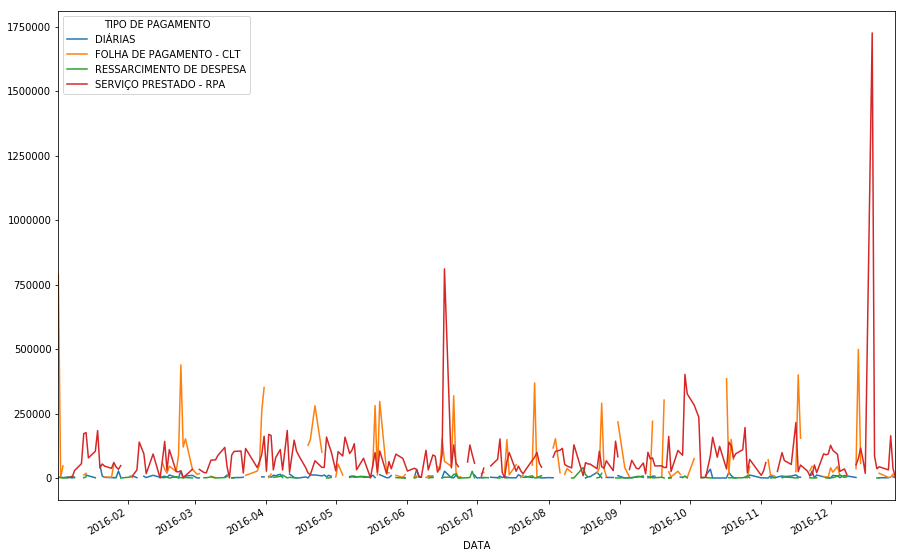

In [93]:
pd.pivot_table(\
               df[df['TIPO DE PAGAMENTO'].isin(TIPOS_DE_PAGAMENTOS_CHEIOS)],
               values='VALOR (R$)',
               index='DATA',
               columns='TIPO DE PAGAMENTO',
               aggfunc='sum')\
.plot(figsize=(15, 10))

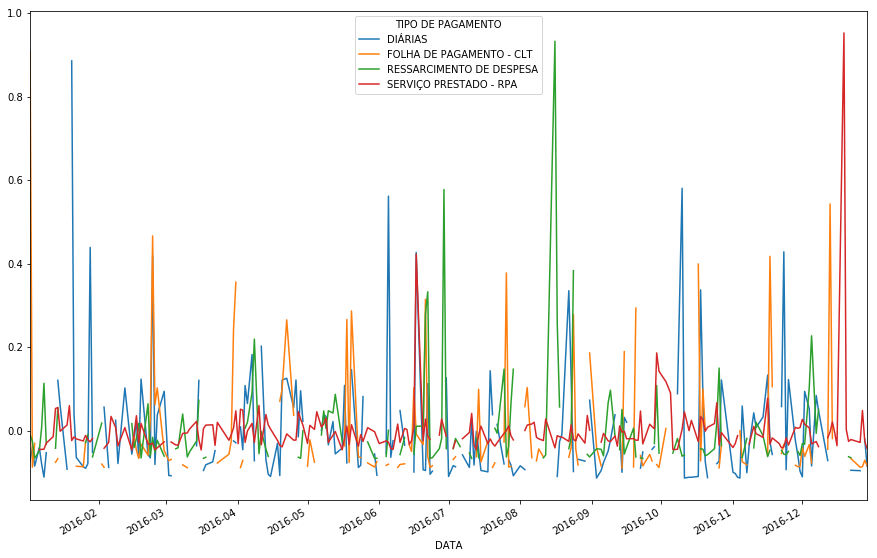

In [92]:
# normalized (x - mean) / (max - min)
pd.pivot_table(\
               df[df['TIPO DE PAGAMENTO'].isin(TIPOS_DE_PAGAMENTOS_CHEIOS)],
               values='VALOR (R$)',
               index='DATA',
               columns='TIPO DE PAGAMENTO',
               aggfunc='sum')\
.apply(lambda x: (x - x.mean()) / (x.max() - x.min()))\
.plot(figsize=(15, 10))

# Maiores pagamentos individuais

In [3]:
df.nlargest(5, 'VALOR (R$)')

,CPF,NOME,TIPO DE PAGAMENTO,PROJETO,DATA,VALOR (R$)
9929,***.839.713-**,FRANCISCO EDUARDO ARAUJO SOARES,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,2016-12-19,328428.65
5629,***.468.963-**,FRANCISCO SULIANO MESQUITA DE PAULA,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,2016-12-19,212758.81
11291,***.966.093-**,FAUSTO NILO COSTA JUNIOR,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,2016-12-19,212391.25
1603,***.140.963-**,FRANCISCO QUEIROZ D. NETO,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,2016-12-19,182058.44
2810,***.254.288-**,ALEXANDER DE SOUZA LARANJEIRA,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,2016-12-19,129695.70


# Maiores total de pagamentos por NOME

In [4]:
df.groupby('NOME')['VALOR (R$)'].sum().nlargest(10)

NOME
FRANCISCO EDUARDO ARAUJO SOARES        442608.42
FAUSTO NILO COSTA JUNIOR               318561.49
LEONILDO ADAO CHRISTOFOLETTI           295587.39
FRANCISCO SULIANO MESQUITA DE PAULA    290566.73
FRANCISCO QUEIROZ D. NETO              259866.36
ALEXANDER DE SOUZA LARANJEIRA          214399.47
SERGIO JOSE CALVALCANTI BUARQUE        207923.04
MARCELO ARAUJO LIMA                    183525.39
DELBERG PONCE DE LEON                  182890.89
JARBAS ARYEL NUNES DA SILVEIRA         171605.17
Name: VALOR (R$), dtype: float64

# Maiores total de pagamentos por PROJETO

In [18]:
df.groupby('PROJETO')['VALOR (R$)'].sum().nlargest(5)

PROJETO
3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO FORTALEZA 2040                           4257509.66
3143 - TC - LG/UFC/FCPC - MOBILE, TOOLS & CAS                                          2671920.41
0101 - FCPC                                                                            2591622.69
1089 - RESCISAO CONTRATUAL                                                             2051939.74
2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DOS CURSOS DE GRADUACAO DA UAB/UFC 2012    1505959.47
Name: VALOR (R$), dtype: float64

# Maiores total de pagamentos por TIPO DE PAGAMENTO

In [26]:
df.groupby('TIPO DE PAGAMENTO')['VALOR (R$)'].sum().nlargest(3)

TIPO DE PAGAMENTO
SERVIÇO PRESTADO - RPA      18636881.35
FOLHA DE PAGAMENTO - CLT    10419797.39
DIÁRIAS                      1081125.36
Name: VALOR (R$), dtype: float64

# Total de pagamentos por mês

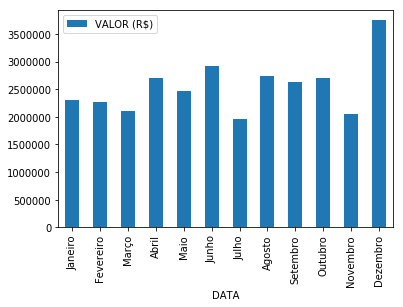

In [16]:
ax = df.groupby(df.DATA.dt.month).sum().plot(kind='bar')
ax.set_xticklabels(MONTHS_PT, rotation=90)
ax.set_xticks(range(0, 12))
pass

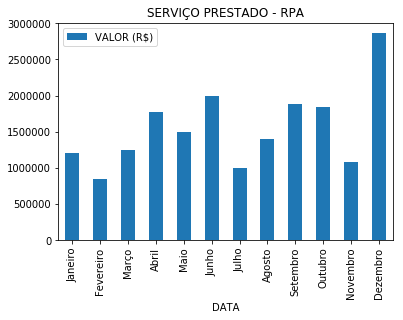

In [40]:
ax = df[df['TIPO DE PAGAMENTO'] == 'SERVIÇO PRESTADO - RPA'].groupby(df.DATA.dt.month).sum().plot(kind='bar')
ax.set_xticklabels(MONTHS_PT, rotation=90)
ax.set_xticks(range(0, 12))
ax.set_title('SERVIÇO PRESTADO - RPA')
pass

# FOLHA DE PAGAMENTO - CLT

In [41]:
clt = df[df['TIPO DE PAGAMENTO'] == 'FOLHA DE PAGAMENTO - CLT']

In [42]:
clt['VALOR (R$)'].describe()

count     3785.000000
mean      2752.918729
std       2647.439803
min          7.740000
25%       1187.740000
50%       2146.690000
75%       3525.550000
max      49822.730000
Name: VALOR (R$), dtype: float64

### Pagamento de 7,74?

In [43]:
clt.nsmallest(1, 'VALOR (R$)')

,CPF,NOME,TIPO DE PAGAMENTO,PROJETO,DATA,VALOR (R$)
9949,***.840.003-**,RODOLFO CESAR FARIAS ARAUJO,FOLHA DE PAGAMENTO - CLT,1089 - RESCISAO CONTRATUAL,2016-10-24,7.74


### Maior pagamento

In [44]:
clt.nlargest(1, 'VALOR (R$)')

,CPF,NOME,TIPO DE PAGAMENTO,PROJETO,DATA,VALOR (R$)
1173,***.096.683-**,MARCELO ARAUJO LIMA,FOLHA DE PAGAMENTO - CLT,1089 - RESCISAO CONTRATUAL,2016-08-04,49822.73


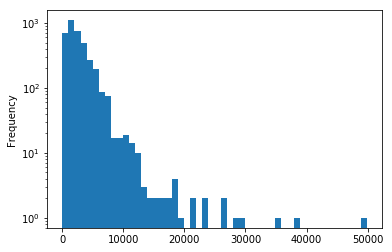

In [58]:
clt['VALOR (R$)'].plot(kind='hist', bins=50, logy=True)

# Das pessoas que receberam mais, no total, como se distribuem os pagamentos ao longo do tempo?

In [104]:
maiores = df.groupby('NOME')['VALOR (R$)'].sum().nlargest(4)

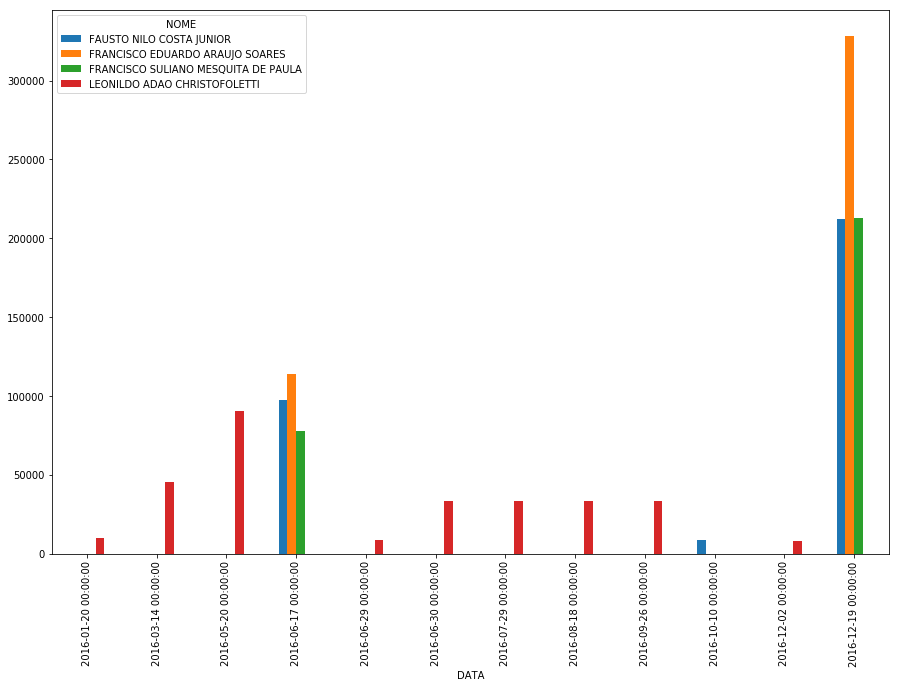

In [105]:
pd.pivot_table(\
               df[df.NOME.isin(maiores.index)],
               values='VALOR (R$)',
               index='DATA',
               columns='NOME',
               aggfunc='sum')\
.plot(figsize=(15, 10), kind='bar')